In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import neural_network
from sklearn import linear_model
from sklearn import tree
#import graphviz 
import numpy as np
from scipy import stats 
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.ensemble import ExtraTreesClassifier
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


# Etapa 1: Preprocesamiento

## Cargamos las bases de datos (excel)


In [2]:
#Cargamos las bases de datos

db_displasia = pd.read_excel('SMD.xls')


db_hepatopata = pd.read_excel('Hepatopata.xls')


db_oncologicos = pd.read_excel('Oncologicos.xls')


db_PTI = pd.read_excel('PTI.xls')

## Informacion de cada una de las db


In [3]:
#Informacion SMD
db_displasia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(9), object(8)
memory usage: 358.4+ KB


In [4]:
#Informacion Hepatopata
db_hepatopata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 88 columns):
LEU      342 non-null float64
NEU      342 non-null float64
NEUp     342 non-null float64
LIN      342 non-null float64
LINp     342 non-null float64
MON      342 non-null float64
MONp     342 non-null float64
EOS      342 non-null float64
EOSp     342 non-null float64
BAS      342 non-null float64
BASp     342 non-null float64
IG       342 non-null float64
IGp      342 non-null float64
ERIT     342 non-null float64
HGB      342 non-null float64
HCT      342 non-null float64
VCM      342 non-null float64
HCM      342 non-null float64
CHCM     342 non-null float64
RDW      342 non-null object
ERBL     342 non-null float64
ERBLp    342 non-null float64
RET      49 non-null float64
RETp     49 non-null float64
FRI      49 non-null float64
RETHE    49 non-null float64
PLT      341 non-null float64
VPM      342 non-null object
IPF      234 non-null float64
HIPER    49 non-null float64
HY

In [5]:
#Informacion oncologicos
db_oncologicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 88 columns):
LEU      303 non-null float64
NEU      303 non-null float64
NEUp     303 non-null float64
LIN      303 non-null float64
LINp     303 non-null float64
MON      303 non-null float64
MONp     303 non-null float64
EOS      303 non-null float64
EOSp     303 non-null float64
BAS      303 non-null float64
BASp     303 non-null float64
IG       303 non-null float64
IGp      303 non-null float64
ERIT     303 non-null float64
HGB      303 non-null float64
HCT      303 non-null float64
VCM      303 non-null float64
HCM      303 non-null float64
CHCM     303 non-null float64
RDW      303 non-null float64
ERBL     303 non-null float64
ERBLp    303 non-null float64
RET      82 non-null float64
RETp     82 non-null float64
FRI      82 non-null float64
RETHE    82 non-null float64
PLT      302 non-null float64
VPM      303 non-null object
IPF      82 non-null float64
HIPER    82 non-null float64
HY

In [6]:
#Informacion PTI
db_PTI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 110 entries, LEU to ESSYS
dtypes: float64(93), int64(10), object(7)
memory usage: 172.8+ KB


## Limpieza de variables bajo supervision clinica y codificacion de etiquetas

In [7]:

db_smd = db_displasia.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [8]:
#Añadimos una nueva variable que identifique la patologia (SMD --> 0)

db_smd['Diagnosis']=np.zeros((417,1),dtype=np.int8)

In [9]:
db_hpt = db_hepatopata.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [10]:
#Añadimos una variable que identifique el diagnostico (HPT --> 1)
db_hpt['Diagnosis']=np.ones((342,1),dtype=np.int8)

In [11]:
db_onc = db_oncologicos.drop(['WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [12]:
#Añadimos una variable que identifique el diagnostico (ONC --> 2)
db_onc['Diagnosis']=np.full((303,1),2)

In [13]:

db_pti = db_PTI.drop(['PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','AVSBL','AVSPL','AVSRJ','AVNRB','ESSYS','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)


In [14]:
#Añadimos una variable que identifique el diagnostico
db_pti['Diagnosis']=np.full((201,1),3)

## Fusionamos las bases de datos y representamos diagrama de cajas y bigotes

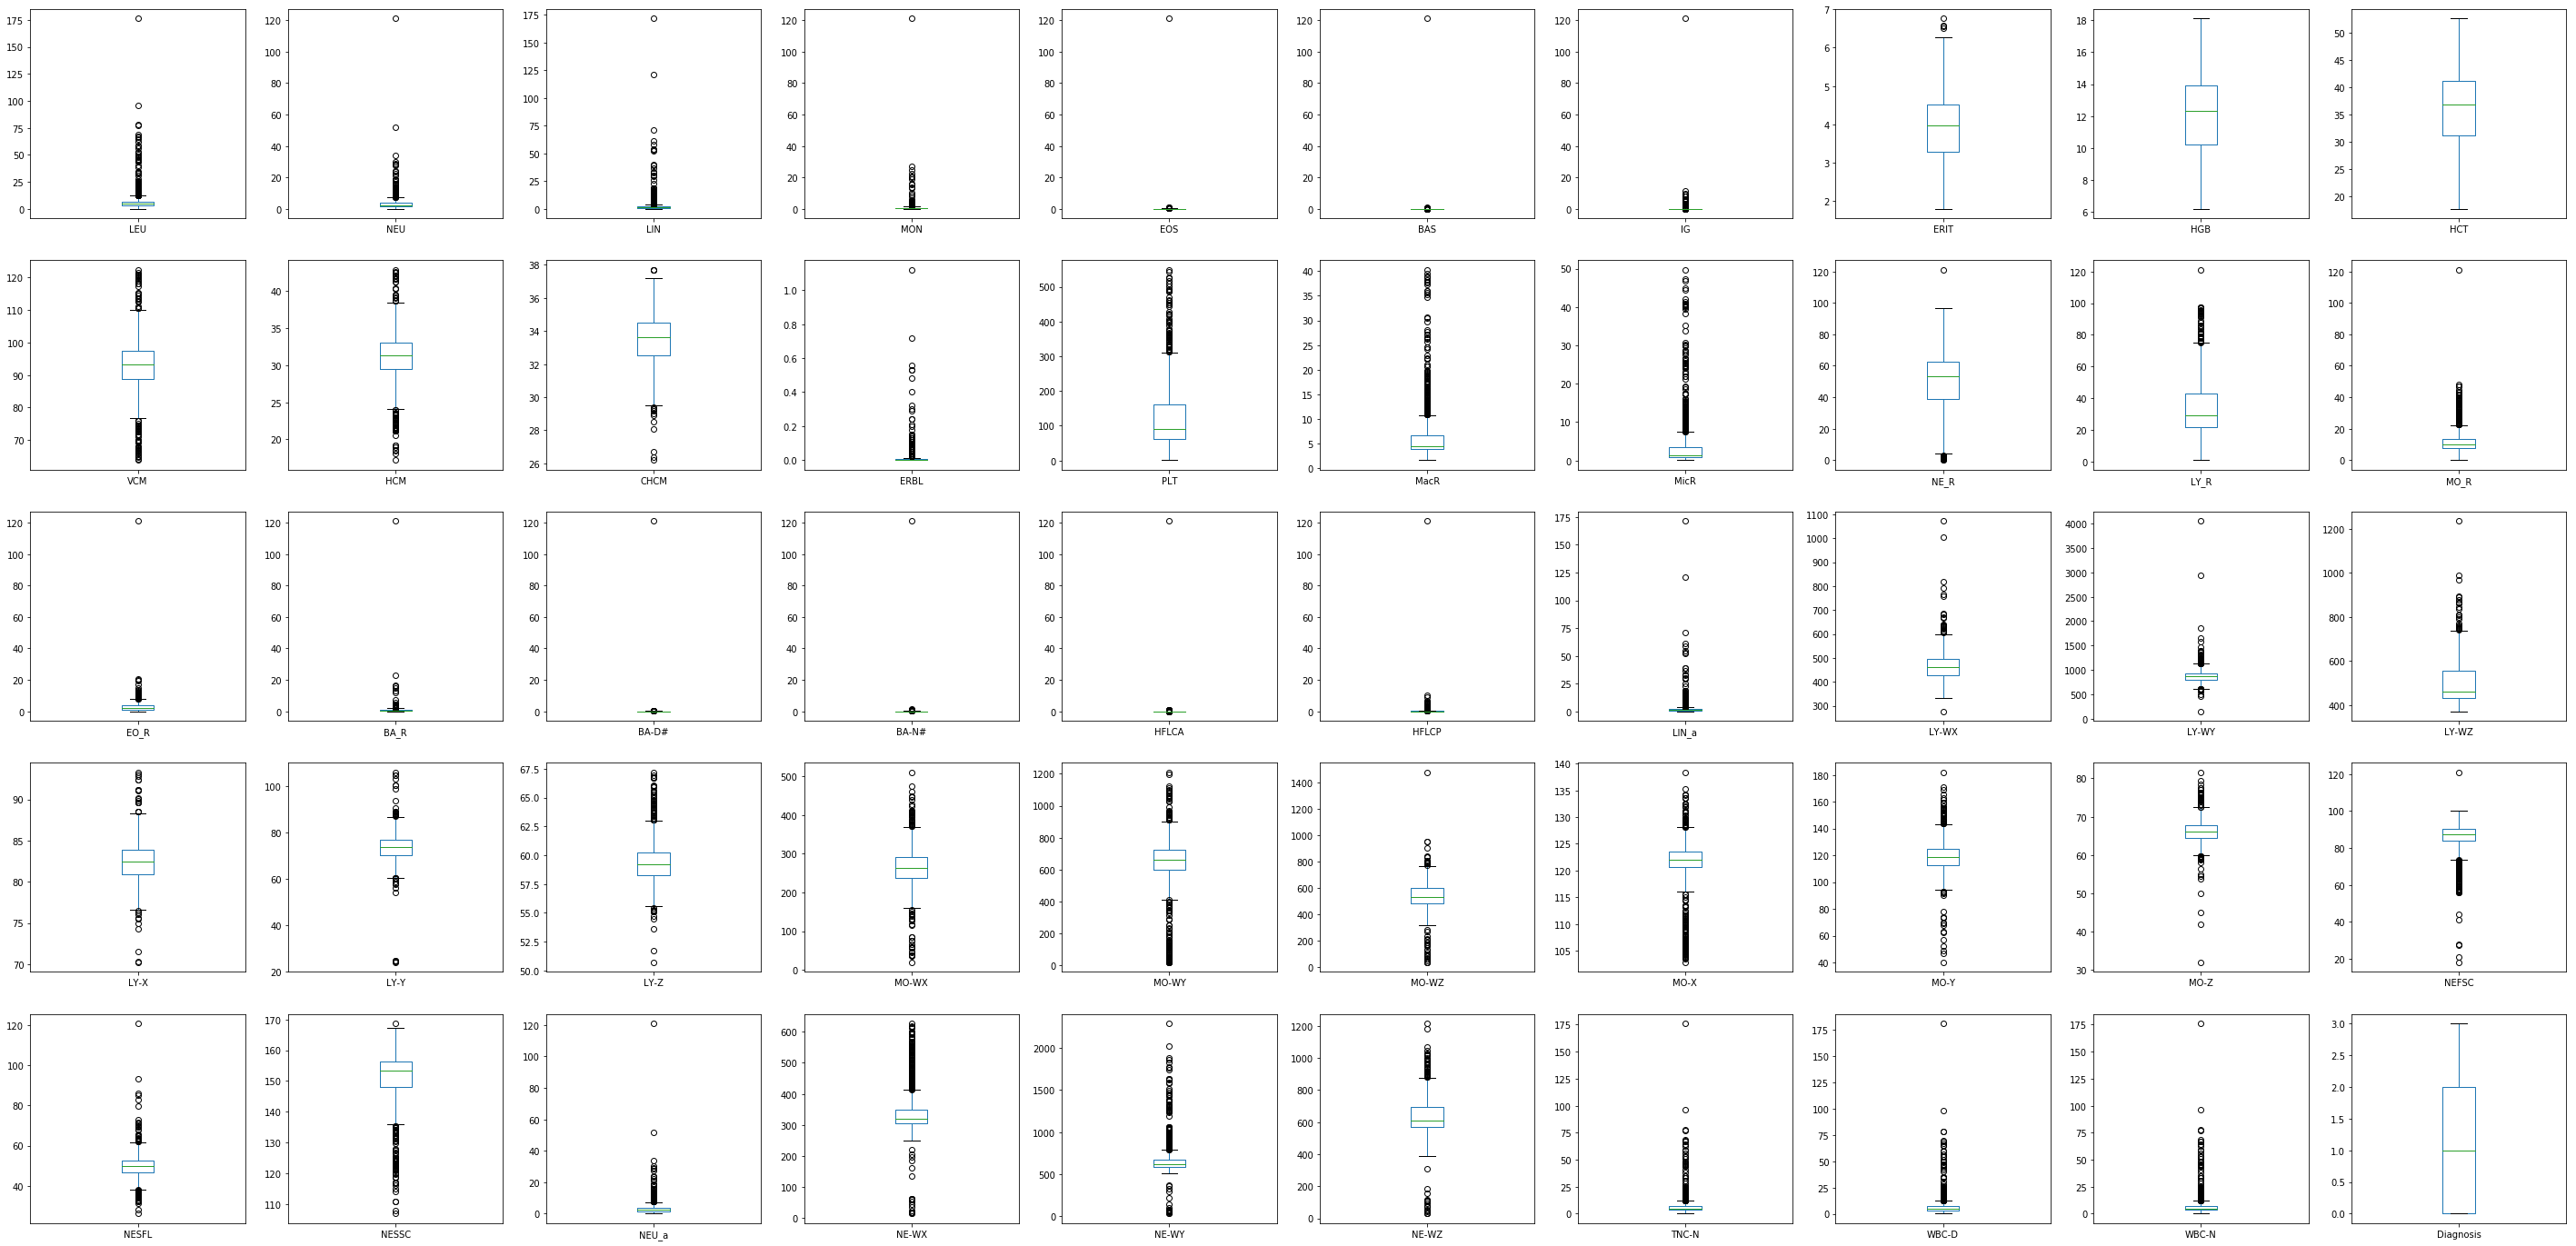

In [16]:
db_final = pd.concat([db_smd,db_hpt,db_onc,db_pti])

#db_final.info()

db_final = db_final.replace(np.nan ,np.mean(db_final['PLT']))




db_final.plot(kind='box',subplots=True, layout= (10,10), sharex= False, sharey = False, figsize = (50,50))
plt.show()

## Opcional: Eliminar los outliers utilizando z-score

In [ ]:
#Obtenemos z-score

z = np.abs(stats.zscore(db_final))


#Establecemps un umbral 

threshold = 2
pos = np.where(z >threshold)

#Eliminamos los outliers identificados por z-score 

#db_final = db_final[(z < threshold).all(axis=1)]

## Aleatorizamos y realizamos las particiones (Train y Validacion)

In [17]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']
y_vals = np.eye(len(set(y)))[y]


x_train,x_test,y_train,y_test = train_test_split(x,y_vals, test_size=0.2, random_state=7)

y_test_cls = np.array([label.argmax() for label in y_test])

## Cargamos las bases de datos de Test (una por patologia)

In [18]:
db_displasia_test = pd.read_excel('smdtest.xls')


db_hepatopata_test = pd.read_excel('hpttest.xls')


db_oncologicos_test = pd.read_excel('oncotest.xls')


db_PTI_test = pd.read_excel('ptitest.xls')

## Limpieza de variables en test bajo supervision clinica y codificacion de etiquetas

In [19]:
db_smd_test = db_displasia_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_smd_test['Diagnosis']=np.zeros((10,1),dtype=np.int8)

db_hpt_test = db_hepatopata_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_hpt_test['Diagnosis']=np.ones((19,1),dtype=np.int8)


db_onc_test = db_oncologicos_test.drop(['Número','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_onc_test['Diagnosis']=np.full((19,1),2,dtype=np.int8)

db_pti_test = db_PTI_test.drop(['Número','Fecha','Código Externo','PLTI','PLTF','PLTO','MNEU','MLIN','MMON','MBAS','MEOS','MCAS','MMET','MMIE','MPRO','CPLAS','MBLS','MERI','FRSP','COMHE','WBC-P','IPFA','IPF','HIPF','VPM','RDW','NEUp','LINp','MONp','EOSp','BASp','IGp','ERBLp','RET','RETp','FRI','RETHE','HIPER','HYPO','MACR','MICRO','FRAGM','RBCO','MCHCO','BA-D%','BA-N%','D-HE','FRCA','IRF-Y','LIN_p','NEU_p','RBCHE','RBC-Y','RTNC','RUPP','RET-Y','RPI','TNC-D','TNC-P'],axis=1)
db_pti_test['Diagnosis']=np.full((4,1),3,dtype=np.int8)


# Etapa 2: Machine Learning (Regresion logistica, Knn y Perceptron multicapa)

## Estandarizador y entradas estandarizadas (se aplicara en caso necesario)

In [20]:
scaler = preprocessing.StandardScaler().fit(x_train)

x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

## Regresion logistica (Modelo)

In [21]:
x = tf.placeholder(tf.float32, [None, 49])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([49, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension
#y_test_cls = np.array([label.argmax() for label in y_test])

In [22]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Regresion logistica (Entrenamiento)

In [23]:
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_s, y_true: y_train}

        session.run(optimizer, feed_dict=feed_dict_train)

## Regresion logistica (Validacion)

In [24]:
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_s,
                  y_true: y_test,
                  y_true_cls: y_test_cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


[[66  6  6  5]
 [ 4 65  3  0]
 [ 8 19 32  4]
 [ 2  4  0 29]]
Accuracy on test-set: 75.9%


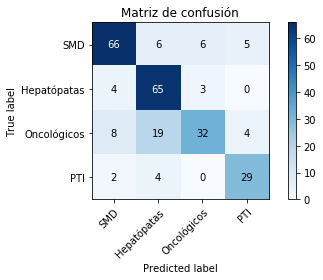

In [25]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()

In [26]:
session.close()

## Knn (Modelo)

In [27]:
# Creacion del modelo knn
x_data_train = tf.placeholder(shape=[None, 49], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, 49], dtype=tf.float32)

## Knn (distancia Manhattan)

cv_k_Scores: [0.8260869565217391, 0.8142292490118577, 0.83399209486166, 0.8260869565217391, 0.8142292490118577, 0.8063241106719368, 0.8221343873517787, 0.8102766798418972, 0.8023715415019763, 0.8063241106719368, 0.8102766798418972, 0.8023715415019763, 0.782608695652174, 0.7707509881422925, 0.7747035573122529, 0.7628458498023716, 0.766798418972332, 0.7549407114624506, 0.7391304347826086, 0.7272727272727273]
20
20


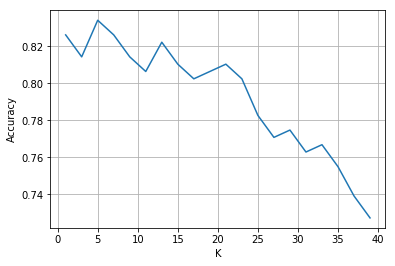

El valor óptimo de vecinos cercanos es: 5
El máximo valor de accuracy es: 0.83399209486166


In [28]:
#Validacion cruzada para obtener una buena capacidad de generalizacion

k_values = range(1,40,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))


Se implementa la distancia Manhattan:valor absoluto de la diferencia entre los valores del vector de dos puntos de datos de x1 y x2.
El comando 'tf.expand_dims' añade una dimension extra a 'x_data_test' para que se puede llevar a cabo la resta.

In [29]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

Reemplazamos el valor de k que hemos obtenido tras realizar validación cruzada.

In [30]:
k = 5

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

- Con la funcion 'tf.nn.top_k()', se obtienes los mayores valores y los índices de KNN. El primer valor de retorno, son los valores de las distancias y por lo tanto se descartan ya que la función 'tf.negative()' hace que los valores sean negativos.


- Con la función 'tf.gather()' extraemos las etiquetas de entrenamiento asociadas a los índices de los vecinos más cercanos. Por tanto, top_k_label son las etiquetas codificadas.


- Con la función 'tf.reduce_sum()', se obtiene la suma de elementos.


- Con la funcion 'tf.argmax()' se obtienen las etiquetas predichas ya que con esta función se obtiene el índice del valor máximo.

## Knn (Manhattan) - Entrenamiento

In [31]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})

## Knn (Manhattan) - Validacion

In [32]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[79  2  1  1]
 [ 2 65  4  1]
 [ 8 17 35  3]
 [ 0  0  3 32]]


In [33]:
import collections

# Contamos cuantos pacientes hay en cada clase
collections.Counter(y_test_cls)

Counter({1: 72, 0: 83, 2: 63, 3: 35})

In [34]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))

0.83399209486166


## Knn (Euclidea)

En este punto, se realiza validación cruzada tomando como medida de distancia la euclídea, ya que sabemos que KNN es sensible a la distancia que se considere (los vecinos cercanos pueden cambiar).

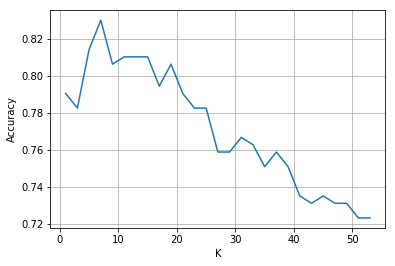

El valor óptimo de vecinos cercanos es: 7
El máximo valor de accuracy es: 0.8300395256916996


In [35]:
k_values = range(1,55,2)
cv_k_scores = []

# Definimos la distancia euclidea
euclidian_distance = tf.sqrt(tf.reduce_sum(tf.square(tf.subtract(x_data_train, tf.expand_dims(x_data_test,1))), axis=2))


for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))



plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))

Hemos obtenido como valor óptimo de vecinos cercanos el valor 7, por tanto creamos el modelo con este valor de k.

In [37]:
k = 7

# K puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(euclidian_distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

## Knn (Euclidea) - Entrenamiento

In [38]:
sess = tf.Session()
prediction_outcome_d2 = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_s,
                               x_data_test: x_test_s,
                               y_data_train: y_train})

## Knn (Euclidea) - Validacion

In [39]:
# Matriz de confusión 

con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome_d2 )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[77  2  2  2]
 [ 2 65  3  2]
 [ 7 16 39  1]
 [ 1  3  2 29]]


In [40]:
# Obtenemos la tasa de acierto
accuracy_d2 = 0
for pred, actual in zip(prediction_outcome_d2, y_test):
    if pred == np.argmax(actual):
        accuracy_d2 += 1
print('Tasa de acierto:',accuracy_d2 / len(prediction_outcome_d2))



Tasa de acierto: 0.8300395256916996


## Red neuronal : Perceptron multicapa

In [41]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

Obtenemos los valores de las etiquetas (0,1,2 y 3) ya que estaban codificadas, y para el entrenamiento de la red neuronal se requieren con dichos valores


In [42]:
y_train_cls = np.array([label.argmax() for label in y_train])


Validación cruzada - Tamaño del batch, épocas y optimizador

In [43]:
def build_model(optimizer):
  model = Sequential()
  model.add(Dense(32, input_shape=(x_train_s.shape[1],), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(4, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
  return model



In [44]:
parameters = parameters = {'batch_size': [16,32],
             'epochs':[100,300],
             'optimizer': ['adam', 'rmsprop']}

estimator = KerasClassifier(build_fn=build_model, verbose=0)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls)
grid_search.best_params_

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


{'batch_size': 16, 'epochs': 100, 'optimizer': 'rmsprop'}

Validación cruzada - Número de neuronas de entrada

Una vez que obtenemos los parámetros óptimos los definimos en el estimador y realizamos validación cruzada para obtener el número de neuronas a la entrada de las capas.

In [45]:
def build_model(l1, l2):
  model = Sequential()
  model.add(Dense(l1, input_shape=(x_train_s.shape[1],), activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(l2, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(4, activation='sigmoid'))
  model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
  return model

parameters = {'l1':[16,32,64],
             'l2':[16,23,64]}



In [46]:
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls) 
grid_search.best_params_

{'l1': 64, 'l2': 16}

Validación cruzada - Dropouts

Una vez tenemos los correspondientes valores de las capas, los sustituimos y buscamos con los porcentajes de dropout óptimos

In [47]:
#Dropouts

def build_model(d1, d2):
    model = Sequential()
    model.add(Dense(64, input_shape=(x_train_s.shape[1],), activation='relu'))
    model.add(Dropout(d1))
    model.add(Dense(23, activation='relu'))
    model.add(Dropout(d2))
    model.add(Dense(4, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])
    return model

parameters = {'d1':[0.1,0.2,0.3],
             'd2':[0.1,0.2,0.3]}



In [48]:
estimator = KerasClassifier(build_fn=build_model, verbose=0, batch_size=32, epochs=100)
grid_search = GridSearchCV(estimator=estimator, param_grid=parameters, scoring='accuracy', cv=3)
grid_search.fit(x_train_s, y_train_cls)
grid_search.best_params_

{'d1': 0.2, 'd2': 0.1}

Una vez que hemos obtenido los parámetros libres a través de validación cruzada creamos el modelo definitivo

In [49]:
# Crearemos una serie de capas de neuronas secuenciales
model = Sequential()

# Capa de entrada con 49 neuronas
# La primera capa oculta tiene 64 neuronas
model.add(Dense(64, input_shape=(x_train_s.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(23, activation='relu'))
model.add(Dropout(0.3))

# Agregamos una capa con 4 neuronas de salida y función de activación sigmoide
model.add(Dense(4, activation='sigmoid'))


In [50]:
# Función de pérdida: binary_crossentropy, optimizador= adam, definimos exactitud como métrica

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [51]:
model.fit(x_train_s, y_train, epochs=100, batch_size=32, validation_split=0.1)

Train on 909 samples, validate on 101 samples
Epoch 1/100
909/909 [==============================] - 1s 618us/step - loss: 1.3187 - accuracy: 0.3905 - val_loss: 1.2600 - val_accuracy: 0.4752
Epoch 2/100
909/909 [==============================] - 0s 64us/step - loss: 1.2474 - accuracy: 0.4730 - val_loss: 1.1699 - val_accuracy: 0.5842
Epoch 3/100
909/909 [==============================] - 0s 70us/step - loss: 1.1342 - accuracy: 0.5204 - val_loss: 1.0839 - val_accuracy: 0.6436
Epoch 4/100
909/909 [==============================] - 0s 72us/step - loss: 1.0437 - accuracy: 0.5809 - val_loss: 1.0277 - val_accuracy: 0.6535
Epoch 5/100
909/909 [==============================] - 0s 68us/step - loss: 0.9882 - accuracy: 0.6139 - val_loss: 0.9920 - val_accuracy: 0.6436
Epoch 6/100
909/909 [==============================] - 0s 60us/step - loss: 0.9383 - accuracy: 0.6205 - val_loss: 0.9665 - val_accuracy: 0.6436
Epoch 7/100
909/909 [==============================] - 0s 62us/step - loss: 0.8937 - accu

909/909 [==============================] - 0s 61us/step - loss: 0.4668 - accuracy: 0.8196 - val_loss: 0.6392 - val_accuracy: 0.8020
Epoch 58/100
909/909 [==============================] - 0s 58us/step - loss: 0.4553 - accuracy: 0.8240 - val_loss: 0.6418 - val_accuracy: 0.7921
Epoch 59/100
909/909 [==============================] - 0s 55us/step - loss: 0.4905 - accuracy: 0.8240 - val_loss: 0.6341 - val_accuracy: 0.8020
Epoch 60/100
909/909 [==============================] - 0s 53us/step - loss: 0.4360 - accuracy: 0.8460 - val_loss: 0.6378 - val_accuracy: 0.7921
Epoch 61/100
909/909 [==============================] - 0s 56us/step - loss: 0.4707 - accuracy: 0.8251 - val_loss: 0.6332 - val_accuracy: 0.7822
Epoch 62/100
909/909 [==============================] - 0s 58us/step - loss: 0.4693 - accuracy: 0.8284 - val_loss: 0.6315 - val_accuracy: 0.7921
Epoch 63/100
909/909 [==============================] - 0s 56us/step - loss: 0.4301 - accuracy: 0.8416 - val_loss: 0.6297 - val_accuracy: 0.811

In [52]:
# Evaluamos en el conjunto de entrenamiento
scores = model.evaluate(x_train_s, y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

1010/1010 [==============================] - 0s 44us/step

accuracy: 91.68%


In [53]:
# Evaluamos el modelo en el conjunto de validacion
print('\n# Evaluación en el conjunto de validación')
scores = model.evaluate(x_test_s, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# Obtenemos las predicciones
predictions_mlp_codif = model.predict(x_test_s).round()

# Obtenemos las predicciones con valores 0,1,2 y 3 ya que estaban codificadas
predictions_mlp = np.array([label.argmax() for label in predictions_mlp_codif])

#print(predictions_mlp)


# Evaluación en el conjunto de validación
253/253 [==============================] - 0s 49us/step

accuracy: 84.19%


In [54]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=predictions_mlp )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[82  1  0  0]
 [30 40  1  1]
 [42  7 14  0]
 [ 8  0  0 27]]


## Red neuronal sobre bases de datos TEST

In [55]:
# Para obtener las predicciones eliminamos el diagnostico y el identificado de número

x_test_db_smd = db_smd_test.drop(['Diagnosis'], axis=1)
x_test_db_hpt = db_hpt_test.drop(['Diagnosis'], axis=1)
x_test_db_onc = db_onc_test.drop(['Diagnosis'], axis=1)
x_test_db_pti = db_pti_test.drop(['Diagnosis'], axis=1)

In [56]:
# Estandarizamos las bases de datos

x_test_db_smd = scaler.transform(x_test_db_smd)
x_test_db_hpt = scaler.transform(x_test_db_hpt)
x_test_db_onc = scaler.transform(x_test_db_onc)
x_test_db_pti = scaler.transform(x_test_db_pti)

In [57]:
# Probamos con db_smd
predictions_mlp_codif_db_smd = model.predict(x_test_db_smd).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_smd = np.array([label.argmax() for label in predictions_mlp_codif_db_smd])

print(predictions_mlp_codif_db_smd)

[0 0 0 0 0 0 0 0 0 0]


In [58]:
# Probamos con db_hpt
predictions_mlp_codif_db_hpt = model.predict(x_test_db_hpt).round()

# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_hpt = np.array([label.argmax() for label in predictions_mlp_codif_db_hpt])

print(predictions_mlp_codif_db_hpt)

[0 1 1 0 0 0 1 0 0 0 0 0 1 0 2 0 1 1 1]


In [59]:
# Probamos con x_test_db_onc

predictions_mlp_codif_db_onc = model.predict(x_test_db_onc).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_onc = np.array([label.argmax() for label in predictions_mlp_codif_db_onc])

print(predictions_mlp_codif_db_onc)


[0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [60]:
# Probamos con x_test_db_pti

predictions_mlp_codif_db_pti = model.predict(x_test_db_pti).round()


# Obtenemos las predicciones con valores ya que estaban codificadas
predictions_mlp_codif_db_pti = np.array([label.argmax() for label in predictions_mlp_codif_db_pti])

print(predictions_mlp_codif_db_pti)

[3 0 0 0]


# Etapa 3: Seleccion de caracteristicas

## Metodo de filtrado: Prueba F de Fisher (F)

In [61]:
#Realizamos las particiones de entrenamiento y test

x = db_final.drop(['Diagnosis'],axis=1)
y = db_final['Diagnosis']

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [62]:
#Algoritmo univariante de prueba F

n_variables = 20

selector_f = SelectKBest(f_classif, k= n_variables)

selection_f = selector_f.fit(x_train,y_train)

atrib_matrix_f = selection_f.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_f)

selected_atributes_f = []

for i in range(len(atrib_names)):
    if atrib_matrix_f[i] == True:
        selected_atributes_f.append(atrib_names[i])
        
print('\n F de Fisher:', selected_atributes_f)

['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[ True False  True False False False False  True  True  True False False
 False False  True  True  True False False False False False False False
 False False  True False False False  True False False False False False
  True False  True  True False  True False  True  True  True  True  True
  True]

 F de Fisher: ['LEU', 'LIN', 'ERIT', 'HGB', 'HCT', 'PLT', 'MacR', 'MicR', 'LIN_a', 'LY-X', 'MO-X', 'MO-Z', 'NEFSC', 'NESSC', 'NE-WX', 'NE-WY', 'NE-WZ', 'TNC-N', 'WBC-D', 'WBC-N']


## Metodo de empaquetamiento: Eliminacion recursiva de atributos (ERA)

In [63]:
#Eliminacion recursiva de atributos

n_variables = 20

selector_elim = ExtraTreesClassifier()

era = RFE(selector_elim, n_variables)

selection_era = era.fit(x_train, y_train)

atrib_matrix_era = selection_era.get_support()

atrib_names = x_train.columns.values

print(atrib_names)
print(atrib_matrix_era)

selected_atributes_era = []

for i in range(len(atrib_names)):
    if atrib_matrix_era[i] == True:
        selected_atributes_era.append(atrib_names[i])
        
print('\n ERA:',selected_atributes_era )

['LEU' 'NEU' 'LIN' 'MON' 'EOS' 'BAS' 'IG' 'ERIT' 'HGB' 'HCT' 'VCM' 'HCM'
 'CHCM' 'ERBL' 'PLT' 'MacR' 'MicR' 'NE_R' 'LY_R' 'MO_R' 'EO_R' 'BA_R'
 'BA-D#' 'BA-N#' 'HFLCA' 'HFLCP' 'LIN_a' 'LY-WX' 'LY-WY' 'LY-WZ' 'LY-X'
 'LY-Y' 'LY-Z' 'MO-WX' 'MO-WY' 'MO-WZ' 'MO-X' 'MO-Y' 'MO-Z' 'NEFSC'
 'NESFL' 'NESSC' 'NEU_a' 'NE-WX' 'NE-WY' 'NE-WZ' 'TNC-N' 'WBC-D' 'WBC-N']
[ True  True False False False False False  True  True  True False  True
 False False  True  True  True  True  True False False False False False
 False False False False False False False False False False False False
  True False False  True False  True  True  True  True  True  True False
  True]

 ERA: ['LEU', 'NEU', 'ERIT', 'HGB', 'HCT', 'HCM', 'PLT', 'MacR', 'MicR', 'NE_R', 'LY_R', 'MO-X', 'NEFSC', 'NESSC', 'NEU_a', 'NE-WX', 'NE-WY', 'NE-WZ', 'TNC-N', 'WBC-N']


# Bases de datos tras seleccion de caracteristicas (F y ERA)

In [64]:
#Base de datos tras F de Fisher

x = db_final.drop(['Diagnosis'],axis=1)
x_f = x[selected_atributes_f]
y_f = db_final['Diagnosis']
y_vals_f = np.eye(len(set(y_f)))[y_f]

x_f.info()
x_train_f,x_test_f,y_train_f,y_test_f = train_test_split(x_f,y_vals_f, test_size=0.2,random_state=7)

#Estandarizacion

scaler_f = preprocessing.StandardScaler().fit(x_train_f)

x_train_fs = scaler_f.transform(x_train_f)
x_test_fs = scaler_f.transform(x_test_f)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 20 columns):
LEU      1263 non-null float64
LIN      1263 non-null float64
ERIT     1263 non-null float64
HGB      1263 non-null float64
HCT      1263 non-null float64
PLT      1263 non-null float64
MacR     1263 non-null float64
MicR     1263 non-null float64
LIN_a    1263 non-null float64
LY-X     1263 non-null float64
MO-X     1263 non-null float64
MO-Z     1263 non-null float64
NEFSC    1263 non-null float64
NESSC    1263 non-null float64
NE-WX    1263 non-null int64
NE-WY    1263 non-null int64
NE-WZ    1263 non-null int64
TNC-N    1263 non-null float64
WBC-D    1263 non-null float64
WBC-N    1263 non-null float64
dtypes: float64(17), int64(3)
memory usage: 207.2 KB


In [65]:
#Base de datos tras ERA
x = db_final.drop(['Diagnosis'],axis=1)
x_era = x[selected_atributes_era]
y_era = db_final['Diagnosis']
y_vals_era = np.eye(len(set(y_era)))[y_era]

x_era.info()
x_train_era,x_test_era,y_train_era,y_test_era = train_test_split(x_era,y_vals_era, test_size=0.2,random_state=7)

#Estandarizacion

scaler_era = preprocessing.StandardScaler().fit(x_train_era)

x_train_eras = scaler_era.transform(x_train_era)
x_test_eras = scaler_era.transform(x_test_era)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1263 entries, 0 to 200
Data columns (total 20 columns):
LEU      1263 non-null float64
NEU      1263 non-null float64
ERIT     1263 non-null float64
HGB      1263 non-null float64
HCT      1263 non-null float64
HCM      1263 non-null float64
PLT      1263 non-null float64
MacR     1263 non-null float64
MicR     1263 non-null float64
NE_R     1263 non-null float64
LY_R     1263 non-null float64
MO-X     1263 non-null float64
NEFSC    1263 non-null float64
NESSC    1263 non-null float64
NEU_a    1263 non-null float64
NE-WX    1263 non-null int64
NE-WY    1263 non-null int64
NE-WZ    1263 non-null int64
TNC-N    1263 non-null float64
WBC-N    1263 non-null float64
dtypes: float64(17), int64(3)
memory usage: 207.2 KB


## Seleccion de caracteristicas : Regresion logistica (F de Fisher)

In [66]:
#Crear modelo
n_atributos = 20
x = tf.placeholder(tf.float32, [None, n_atributos])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([n_atributos, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension

y_test_cls_f = np.array([label.argmax() for label in y_test_f])
y_test_cls_era = np.array([label.argmax() for label in y_test_era])

In [67]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [68]:
#Entrenamiento con F de Fisher
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_fs, y_true: y_train_f}

        session.run(optimizer, feed_dict=feed_dict_train)


In [69]:
#Validacion con F de Fisher
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_fs,
                  y_true: y_test_f,
                  y_true_cls: y_test_cls_f}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls_f

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[67  7  7  2]
 [ 4 57  9  2]
 [ 9 16 34  4]
 [ 1  3  4 27]]
Accuracy on test-set: 73.1%


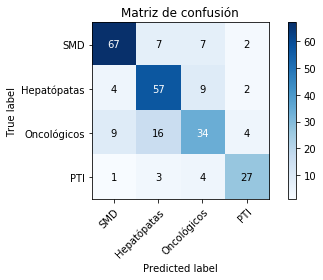

In [70]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()


## Seleccion de caracteristicas: Regresion logistica (ERA)

In [71]:
#Crear modelo
n_atributos = 20
x = tf.placeholder(tf.float32, [None, n_atributos])
y_true = tf.placeholder(tf.float32, [None, 4])
y_true_cls = tf.placeholder(tf.int64, [None])
w = tf.Variable(tf.zeros([n_atributos, 4]))
b = tf.Variable(tf.zeros([4]))
logits = tf.matmul(x, w) + b
y_pred = tf.nn.softmax(logits)
y_pred_cls = tf.argmax(y_pred, axis=1) #axis=dimension

y_test_cls_f = np.array([label.argmax() for label in y_test_f])
y_test_cls_era = np.array([label.argmax() for label in y_test_era])

In [72]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=y_true)
#cost = tf.reduce_mean(cross_entropy)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cross_entropy)
correct_prediction = tf.equal(y_pred_cls, y_true_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [73]:
#Entrenamiento con era
session = tf.Session()
session.run(tf.global_variables_initializer())
def optimize(num_iterations):
    for i in range(num_iterations):
        
        feed_dict_train = {x: x_train_eras, y_true: y_train_era}

        session.run(optimizer, feed_dict=feed_dict_train)

In [74]:
#Validacion con era
classes = ['SMD','Hepatópatas','Oncológicos','PTI']

feed_dict_test = {x: x_test_eras,
                  y_true: y_test_era,
                  y_true_cls: y_test_cls_era}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)

    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))

def plot_confusion_matrix(normalize=False):

    # Compute confusion matrix
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    
    # Get the true classifications for the test-set.
    cls_true = y_test_cls_f

    # Get the predicted classifications for the test-set.
    cls_pred = session.run(y_pred_cls, feed_dict=feed_dict_test)

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title='Matriz de confusión',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

[[68  7  6  2]
 [ 4 58  9  1]
 [11 14 36  2]
 [ 1  2  4 28]]
Accuracy on test-set: 75.1%


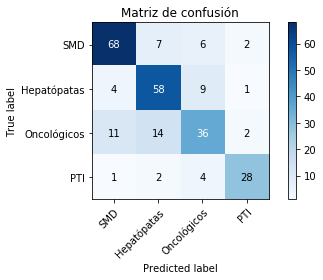

In [75]:
optimize(num_iterations=1000)
plot_confusion_matrix()
print_accuracy()

## Seleccion de caracteristicas: Knn (F de Fisher)

In [76]:
# Creacion del modelo knn
n_atributos = 20
x_data_train = tf.placeholder(shape=[None, n_atributos], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, n_atributos], dtype=tf.float32)

cv_k_Scores: [0.8023715415019763, 0.7984189723320159, 0.7905138339920948, 0.8142292490118577, 0.8142292490118577, 0.8023715415019763, 0.7944664031620553, 0.7984189723320159, 0.7786561264822134, 0.782608695652174, 0.7707509881422925, 0.766798418972332, 0.7707509881422925, 0.7747035573122529, 0.7707509881422925, 0.766798418972332, 0.7470355731225297, 0.758893280632411, 0.758893280632411, 0.7509881422924901]
20
20


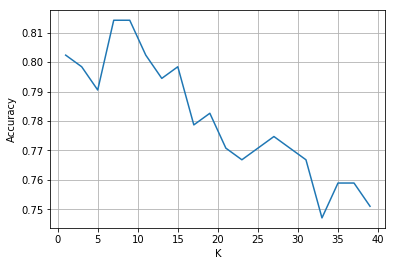

El valor óptimo de vecinos cercanos es: 7
El máximo valor de accuracy es: 0.8142292490118577


In [77]:
#Validacion cruzada para obtener una buena capacidad de generalizacion

k_values = range(1,40,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_fs,
                               x_data_test: x_test_fs,
                               y_data_train: y_train_f})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test_f):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))


In [78]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

In [79]:
k = np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())]

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

In [80]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_fs,
                               x_data_test: x_test_fs,
                               y_data_train: y_train_f})

In [81]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[77  5  1  0]
 [ 4 60  4  4]
 [ 7 15 37  4]
 [ 0  2  1 32]]


In [82]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test_f):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))

0.8142292490118577


## Seleccion de caracteristicas: Knn (ERA)

In [83]:
# Creacion del modelo knn
n_atributos = 20
x_data_train = tf.placeholder(shape=[None, n_atributos], dtype=tf.float32)
y_data_train = tf.placeholder(shape=[None, 4], dtype=tf.float32)
x_data_test = tf.placeholder(shape=[None, n_atributos], dtype=tf.float32)

cv_k_Scores: [0.83399209486166, 0.8260869565217391, 0.7984189723320159, 0.8300395256916996, 0.8102766798418972, 0.782608695652174, 0.7786561264822134, 0.7786561264822134, 0.7628458498023716, 0.7707509881422925, 0.7786561264822134, 0.7786561264822134, 0.7786561264822134, 0.7707509881422925, 0.7707509881422925, 0.7747035573122529, 0.782608695652174, 0.766798418972332, 0.7628458498023716, 0.7628458498023716]
20
20


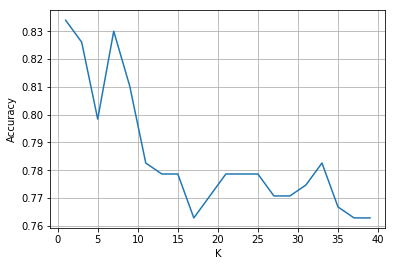

El valor óptimo de vecinos cercanos es: 1
El máximo valor de accuracy es: 0.83399209486166


In [84]:
#Validacion cruzada para obtener una buena capacidad de generalizacion

k_values = range(1,40,2)
cv_k_scores = []

distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

for k in k_values:
    _, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
    top_k_label = tf.gather(y_data_train, top_k_indices)

    sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
    prediction = tf.argmax(sum_up_predictions, axis=1)
    sess = tf.Session()
    prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_eras,
                               x_data_test: x_test_eras,
                               y_data_train: y_train_era})
    
    accuracy = 0
    for pred, actual in zip(prediction_outcome, y_test_era):
        if pred == np.argmax(actual):
            accuracy += 1
    cv_k_scores.append(accuracy / len(prediction_outcome))

        
print('cv_k_Scores:',cv_k_scores)
print(len(cv_k_scores))
print(len(k_values))


plt.plot(k_values, cv_k_scores)
plt.grid()

plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()


# Seleccionamor el maximo porque consideramos accuracy

print('El valor óptimo de vecinos cercanos es:',np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())])

# Obtenemos el máximo valor de accuracy 

print('El máximo valor de accuracy es:',max(cv_k_scores))


In [85]:
distance = tf.reduce_sum(tf.abs(tf.subtract(x_data_train, tf.expand_dims(x_data_test, 1))), axis=2)

In [86]:
k = np.array(k_values)[cv_k_scores.index(np.array(cv_k_scores).max())]

# k puntos mas cercanos
_, top_k_indices = tf.nn.top_k(tf.negative(distance), k=k)
top_k_label = tf.gather(y_data_train, top_k_indices)

sum_up_predictions = tf.reduce_sum(top_k_label, axis=1)
prediction = tf.argmax(sum_up_predictions, axis=1)

In [87]:
sess = tf.Session()
# Obtenemos las predicciones
prediction_outcome = sess.run(prediction, feed_dict = 
                              {x_data_train: x_train_eras,
                               x_data_test: x_test_eras,
                               y_data_train: y_train_era})


In [88]:
# Obtenemos la matriz de confusión
con = tf.confusion_matrix(labels=y_test_cls, predictions=prediction_outcome )
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

[[78  1  3  1]
 [ 5 57  9  1]
 [ 9 11 42  1]
 [ 0  0  1 34]]


In [89]:
accuracy = 0
for pred, actual in zip(prediction_outcome, y_test_era):
    if pred == np.argmax(actual):
        accuracy += 1
print(accuracy / len(prediction_outcome))

0.83399209486166
